In [77]:
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import sys
sys.path.append("/Users/Trevor1/Desktop/git/CIV_Distance/")
from CIVfunctions import project,CIV_distance

In [2]:
!ls

AllXRayData.071221.fits       CIVDistsBokehGTR.070521.ipynb
AllXRayData.fits              CIVDistsBokehGTR_trevor.ipynb
CIVDistBokehGTR.070521.html   CIV_amy_scaled_linear.npy
CIVDistBokehGTR.html          CIV_amy_scaled_log.npy
CIVDistBokehGTR_logCIVEW.html Untitled.ipynb


In [60]:
df = Table.read('AllXRayData.071221.fits', format='fits')
dat = df.to_pandas()
dat.head()

SDSS  LOGEDD_RATIO    Gamma  f2keV_ergs      L2500  \
0  b'SDSSJ123003.80+162308.2'         -0.76  1.85810  -31.759840  31.096001   
1  b'150313.62+575151.5     '         -0.42  2.20000  -30.648514  31.443727   
2  b'SDSSJ092513.03+363748.5'           NaN  2.13456  -32.024640  30.580400   
3  b'SDSSJ135320.48+400809.8'         -0.66  2.89310  -31.597590  30.796700   
4  b'103151.76-013557.2     '           NaN  1.60000  -31.154761  30.838674   

   Alpha_ox  Delta_Alpha_ox  New_Delta_Alpha_ox    Delg-i  Timlin_CIV_EQW  \
0 -1.617769       -0.002665           -0.039064  0.116000             NaN   
1 -1.622615        0.061687            0.022610 -0.071669             NaN   
2 -1.456527        0.055972            0.023543  0.042000             NaN   
3 -1.584457       -0.028914           -0.063009 -0.095000             NaN   
4 -1.499198        0.064698            0.030281 -0.141138             NaN   

   ...  Old_redshift  Redshifts  HeII_EQW  LOGBH  Data_source  Clean  \
0  ...           NaN    2.37464  0.393129   9.72            4  False   
1  ...      1.721368        NaN       NaN   9.59            1  False   
2  ...           NaN    2.77289  2.818198    NaN            4  False   
3  ...           NaN    1.67258  0.651358   9.13            4  False   
4  ...      2.295000    2.29601  3.535803    NaN            1  False   

           RA        DEC  Nardini_Sample  EV1  
0  187.515859  16.385636           False  NaN  
1  225.806747  57.864326           False  NaN  
2  141.304324  36.630149           False  NaN  
3  208.335375  40.136058           False  NaN  
4  157.965674  -1.599229           False  NaN  

[5 rows x 23 columns]

In [61]:
#Create a "good" mask for non-nans
blue = dat["CIV_blue"].values
gamma = dat["Gamma"].values
daox  = dat["Delta_Alpha_ox"].values
dat = dat[~np.isnan(blue)&~np.isnan(daox)&~np.isinf(gamma)]

In [62]:
gamma = dat["Gamma"].values
daox  = dat["Delta_Alpha_ox"].values
blue = dat["CIV_blue"].values
ew   = dat["CIV_EW"].values
logEW= np.log10(ew)
c4data = np.array([blue, logEW]).T
c4fit = np.load("/Users/Trevor1/Desktop/git/CIV_Distance/data/bestfit.npy")
CIVdist = CIV_distance(c4data, c4fit, step=10, path="/Users/Trevor1/Desktop/git/CIV_Distance/")

In [63]:
dat.shape

(4798, 23)

In [64]:
np.isnan(daox).sum()

0

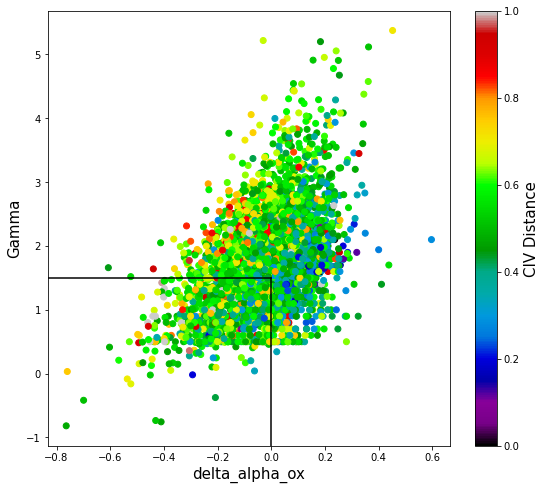

In [102]:
fig = plt.figure(figsize=(9,8))
plt.scatter(daox, gamma, c=CIVdist, cmap="nipy_spectral", edgecolor=None, vmin=0, vmax=1)
xlims, ylims = plt.gca().get_xlim(), plt.gca().get_ylim()
plt.plot([xlims[0],0],[1.5,1.5], "-k")
plt.plot([0,0],[ylims[0],1.5], "-k")
cbar = plt.colorbar()
cbar.ax.set_ylabel('CIV Distance', fontsize=15)
plt.ylim(ylims)
plt.xlim(xlims)
plt.ylabel("Gamma", fontsize=15)
plt.xlabel("delta_alpha_ox", fontsize=15)
plt.show()

We don't know the absorption track for each individual object.  Instead we'll compute the median value of $\Delta\alpha_{ox}$ in bins of $\Gamma$

In [103]:
np.linspace(min(gamma), max(gamma), 10)

array([-0.81740999, -0.12927553,  0.55885892,  1.24699338,  1.93512784,
        2.6232623 ,  3.31139676,  3.99953122,  4.68766567,  5.37580013])

In [104]:
gamma_bins  = np.linspace(min(gamma), max(gamma), 10)
median_daox = []

for i in range(len(gamma_bins)-1):
    daox_med = np.median(daox[((gamma>=gamma_bins[i])&(gamma<gamma_bins[i+1]))])
    median_daox.append(daox_med)

In [105]:
gamma_bins_plot = gamma_bins[:-1] + ((gamma_bins[1]-gamma_bins[0])/2)

In [106]:
len(gamma_bins_plot), len(median_daox)

(9, 9)

In [107]:
median_daox

[-0.47689035237548794,
 -0.185379445025,
 -0.0936913906838,
 -0.020073588046874313,
 0.01901885312345827,
 0.05964431596557507,
 0.10319492700256383,
 0.12230250718750035,
 0.21465167623962467]

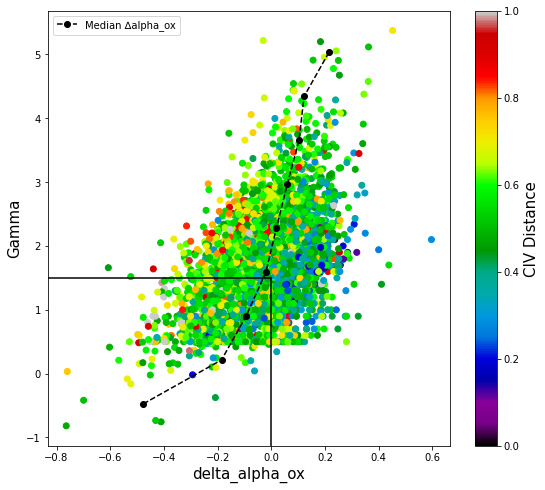

In [108]:
fig = plt.figure(figsize=(9,8))
plt.scatter(daox, gamma, c=CIVdist, cmap="nipy_spectral", edgecolor=None, vmin=0, vmax=1)
xlims, ylims = plt.gca().get_xlim(), plt.gca().get_ylim()
plt.plot([xlims[0],0],[1.5,1.5], "-k")
plt.plot([0,0],[ylims[0],1.5], "-k")
plt.plot(median_daox, gamma_bins_plot, "--o", color="k", label="Median ∆alpha_ox")
cbar = plt.colorbar()
cbar.ax.set_ylabel('CIV Distance', fontsize=15)
plt.ylim(ylims)
plt.xlim(xlims)
plt.ylabel("Gamma", fontsize=15)
plt.xlabel("delta_alpha_ox", fontsize=15)
plt.legend(loc="best")
plt.show()

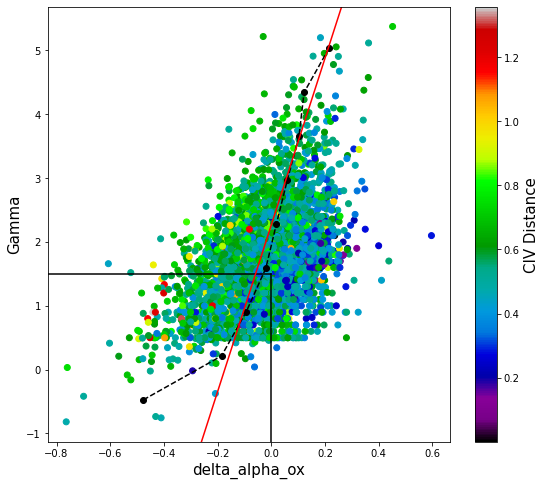

In [111]:
m,b = np.polyfit(median_daox[1:], gamma_bins_plot[1:], 1)
x = np.arange(-0.6, 0.35, 0.01)
y = m*x + b

fig = plt.figure(figsize=(9,8))
plt.scatter(daox, gamma, c=CIVdist, cmap="nipy_spectral", edgecolor=None)
xlims, ylims = plt.gca().get_xlim(), plt.gca().get_ylim()
plt.plot([xlims[0],0],[1.5,1.5], "-k")
plt.plot([0,0],[ylims[0],1.5], "-k")
plt.plot(median_daox, gamma_bins_plot, "--o", color="k")
plt.plot(x,y,"-r")
cbar = plt.colorbar()
cbar.ax.set_ylabel('CIV Distance', fontsize=15)
plt.ylim(ylims)
plt.xlim(xlims)
plt.ylabel("Gamma", fontsize=15)
plt.xlabel("delta_alpha_ox", fontsize=15)
plt.show()

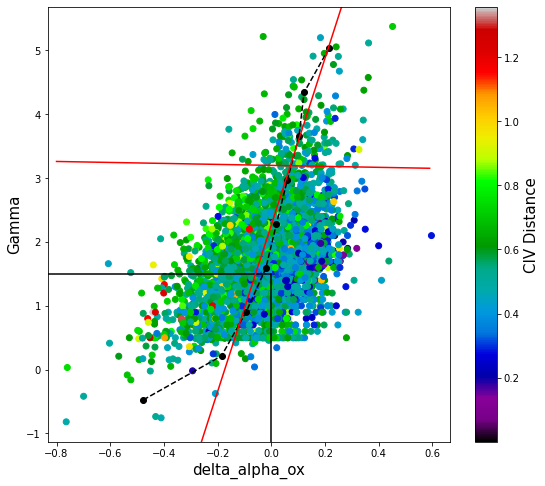

In [112]:
mm, bb = -1/m, 3.2
xx = np.arange(-0.8, 0.6, 0.01)
yy = mm*xx + bb

fig = plt.figure(figsize=(9,8))
plt.scatter(daox, gamma, c=CIVdist, cmap="nipy_spectral", edgecolor=None)
xlims, ylims = plt.gca().get_xlim(), plt.gca().get_ylim()
plt.plot([xlims[0],0],[1.5,1.5], "-k")
plt.plot([0,0],[ylims[0],1.5], "-k")
plt.plot(median_daox, gamma_bins_plot, "--o", color="k")
plt.plot(x,y,"-r")
plt.plot(xx,yy,"-r")
cbar = plt.colorbar()
cbar.ax.set_ylabel('CIV Distance', fontsize=15)
plt.ylim(ylims)
plt.xlim(xlims)
plt.ylabel("Gamma", fontsize=15)
plt.xlabel("delta_alpha_ox", fontsize=15)
plt.show()

Now want the perpendicular axis to the red line.  Gonna need to scale things for lines to actually be perpendicular.

In [79]:
xray_dat = np.array([daox, gamma]).T
scale = MinMaxScaler()
scale.fit(xray_dat)
dat_scale = scale.transform(xray_dat)

In [80]:
gamma_sc = dat_scale[:,1]
daox_sc  = dat_scale[:,0]

In [90]:
gamma_sc_bins  = np.linspace(min(gamma_sc), max(gamma_sc), 10)
median_daox_sc = []

for i in range(len(gamma_sc_bins)-1):
    daox_sc_med = np.median(daox_sc[((gamma_sc>=gamma_sc_bins[i])&(gamma_sc<gamma_sc_bins[i+1]))])
    median_daox_sc.append(daox_sc_med)
    
gamma_sc_bins_plot = gamma_sc_bins[:-1] + ((gamma_sc_bins[1]-gamma_sc_bins[0])/2)

In [96]:
np.array([ylims[0],1.5]).T

array([-0.05,  1.5 ])

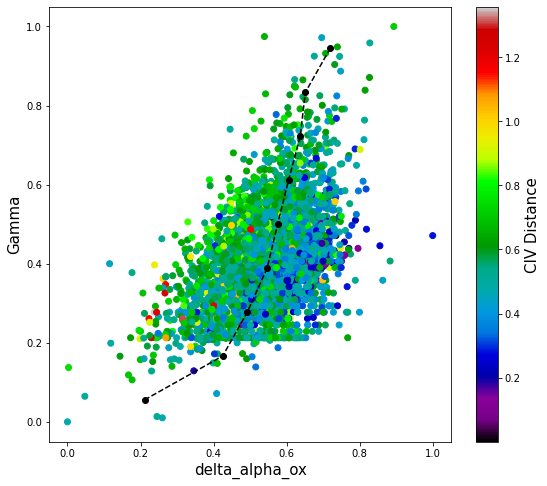

In [99]:
#mm, bb = -1/m, 3.2
#xx = np.arange(-0.8, 0.6, 0.01)
#yy = mm*xx + bb

fig = plt.figure(figsize=(9,8))
plt.scatter(daox_sc, gamma_sc, c=CIVdist, cmap="nipy_spectral", edgecolor=None)
xlims, ylims = plt.gca().get_xlim(), plt.gca().get_ylim()
#plt.plot([xlims[0],0],[1.5,1.5], "-k")
#plt.plot([0,0],[ylims[0],1.5], "-k")
plt.plot(median_daox_sc, gamma_sc_bins_plot, "--o", color="k")
#plt.plot(x,y,"-r")
#plt.plot(xx,yy,"-r")
cbar = plt.colorbar()
cbar.ax.set_ylabel('CIV Distance', fontsize=15)
plt.ylim(ylims)
plt.xlim(xlims)
plt.ylabel("Gamma", fontsize=15)
plt.xlabel("delta_alpha_ox", fontsize=15)
plt.show()

In [115]:
box_tl = scale.transform(np.array([[xlims[0]],[1.5]]).T)
box_tr = scale.transform(np.array([[0],[1.5]]).T)
box_br = scale.transform(np.array([[0],[ylims[0]]]).T)

In [117]:
box_br

array([[0.56142253, 0.12391151]])

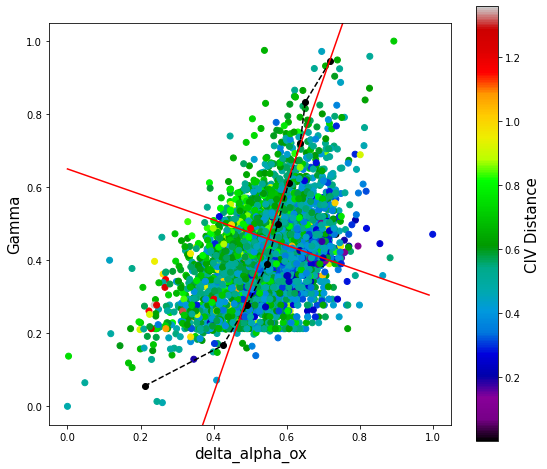

In [121]:
m,b = np.polyfit(median_daox_sc[1:], gamma_sc_bins_plot[1:], 1)
x = np.arange(0.2, 0.8, 0.01)
y = m*x + b

mm, bb = -1/m, 0.65
xx = np.arange(0.0, 1.0, 0.01)
yy = mm*xx + bb

fig = plt.figure(figsize=(9,8))
plt.scatter(daox_sc, gamma_sc, c=CIVdist, cmap="nipy_spectral", edgecolor=None)
xlims, ylims = plt.gca().get_xlim(), plt.gca().get_ylim()
#plt.plot([xlims[0],box_tl[0]],[box_tr[1],box_tr[1]], "-k")
#plt.plot([box_br[0],box_br[0]],[ylims[0],box_tr[1]], "-k")
plt.plot(median_daox_sc, gamma_sc_bins_plot, "--o", color="k")
plt.plot(x,y,"-r")
plt.plot(xx,yy,"-r")
cbar = plt.colorbar()
cbar.ax.set_ylabel('CIV Distance', fontsize=15)
plt.ylim(ylims)
plt.xlim(xlims)
plt.ylabel("Gamma (Scaled)", fontsize=15)
plt.xlabel("delta_alpha_ox (Scaled)", fontsize=15)
plt.gca().set_aspect("equal")
plt.show()

Now do inverse transform to get back to real units.

In [122]:
yax_scale = np.array([x,y]).T
xax_scale = np.array([xx,yy]).T

In [124]:
data = scale.inverse_transform(dat_scale)
yax  = scale.inverse_transform(yax_scale)
xax  = scale.inverse_transform(xax_scale)

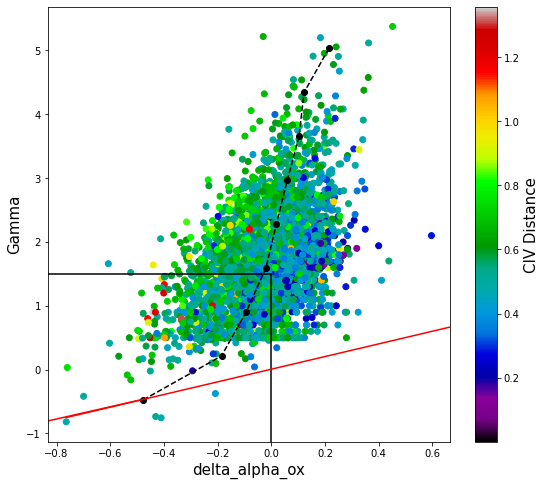

In [125]:
fig = plt.figure(figsize=(9,8))
plt.scatter(daox, gamma, c=CIVdist, cmap="nipy_spectral", edgecolor=None)
xlims, ylims = plt.gca().get_xlim(), plt.gca().get_ylim()
plt.plot([xlims[0],0],[1.5,1.5], "-k")
plt.plot([0,0],[ylims[0],1.5], "-k")
plt.plot(median_daox, gamma_bins_plot, "--o", color="k")
plt.plot(yax[0],yax[1],"-r")
plt.plot(xax[0],xax[1],"-r")
cbar = plt.colorbar()
cbar.ax.set_ylabel('CIV Distance', fontsize=15)
plt.ylim(ylims)
plt.xlim(xlims)
plt.ylabel("Gamma", fontsize=15)
plt.xlabel("delta_alpha_ox", fontsize=15)
plt.show()